# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [2]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# 設定 data_path
dir_data = './data/'

In [3]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [5]:
df_AMT_GOODS_PRICE = app_train['AMT_GOODS_PRICE']
df_AMT_GOODS_PRICE

0          351000.0
1         1129500.0
2          135000.0
3          297000.0
4          513000.0
            ...    
307506     225000.0
307507     225000.0
307508     585000.0
307509     319500.0
307510     675000.0
Name: AMT_GOODS_PRICE, Length: 307511, dtype: float64

In [17]:
np_AMT_GOODS_PRICE= df_AMT_GOODS_PRICE.values
np_AMT_GOODS_PRICE

array([ 351000., 1129500.,  135000., ...,  585000.,  319500.,  675000.])

### numpy向量化操作效能>pandas向量化操作

In [18]:
%%time
df_AMT_GOODS_PRICE.mean()

Wall time: 3.99 ms


538396.2074288895

In [19]:
%%time
np_AMT_GOODS_PRICE.mean()

Wall time: 999 µs


nan

In [22]:
np.nanmean(np_AMT_GOODS_PRICE)

538396.2074288895

In [24]:
print(np.nanmean(np_AMT_GOODS_PRICE))
print(np.nanmax(np_AMT_GOODS_PRICE))
print(np.nanmin(np_AMT_GOODS_PRICE))
print(df_AMT_GOODS_PRICE.std(ddof = 1))

538396.2074288895
4050000.0
40500.0
369446.46054005757


(array([1.31712e+05, 1.15261e+05, 4.36580e+04, 1.24290e+04, 3.17500e+03,
        9.33000e+02, 3.00000e+01, 1.70000e+01, 8.00000e+00, 1.00000e+01]),
 array([  40500.,  441450.,  842400., 1243350., 1644300., 2045250.,
        2446200., 2847150., 3248100., 3649050., 4050000.]),
 <BarContainer object of 10 artists>)

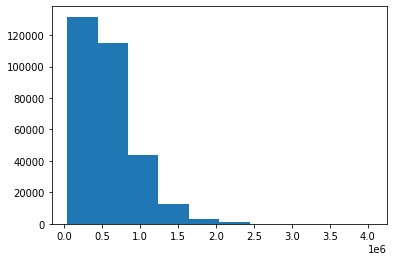

In [25]:
plt.hist(np_AMT_GOODS_PRICE)

使用的欄位存在nan值
1.可用np.nanmean np.nanmax np.nanmin解決  但std還是需要使用pd函數
2.資料存在偏態,為右偏
3.vectorization上numpy速度約pandas千倍,可使用df.values轉到numpy計算